<a href="https://colab.research.google.com/github/iwatake2222/study_karaage_ai/blob/master/karaage_ai_02_00_modelcreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git/
!rm datasets/LICENSE

Cloning into 'datasets'...
remote: Enumerating objects: 210, done.
remote: Total 210 (delta 0), reused 0 (delta 0), pack-reused 210
Receiving objects: 100% (210/210), 4.60 MiB | 17.69 MiB/s, done.
Resolving deltas: 100% (3/3), done.


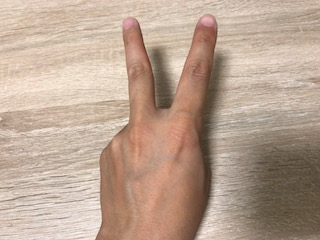

In [ ]:
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage("datasets/choki/choki_01.jpg"))

In [ ]:
!sudo apt install -y tree
!tree -d datasets

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (76.1 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 160815 files and directories currently instal

In [ ]:
dataset_original_dir = "datasets"
dataset_root_dir = "target_datasets"

In [ ]:
!wget https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

--2021-07-11 19:32:27--  https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2683 (2.6K) [text/plain]
Saving to: ‘split_train_val.py’

split_train_val.py  100%[===================>]   2.62K  --.-KB/s    in 0s      

2021-07-11 19:32:27 (30.7 MB/s) - ‘split_train_val.py’ saved [2683/2683]



In [ ]:
import split_train_val
split_train_val.image_dir_train_val_split(dataset_original_dir, dataset_root_dir, train_size=0.67)
!tree -d target_datasets
train_dir = "target_datasets/train"
val_dir = "target_datasets/val"

datasets/gu copy is done
datasets/pa copy is done
datasets/choki copy is done
processing is done
target_datasets
├── train
│   ├── choki
│   ├── gu
│   └── pa
└── val
    ├── choki
    ├── gu
    └── pa

8 directories


In [ ]:
import sys
import os
import shutil

backup_dir = "./model"
labels = [d for d in os.listdir(dataset_original_dir) if os.path.isdir(os.path.join(dataset_original_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
  shutil.rmtree(backup_dir)
os.makedirs(backup_dir)

with open(backup_dir + "/labels.txt", "w") as f:
  for label in labels:
    f.write(label + "\n")

NUM_CLASSES = len(labels)
print("class number = " + str(NUM_CLASSES))

class number = 3


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
labels = []
with open(backup_dir + "/labels.txt", "r") as f:
  for line in f:
    labels.append(line.rstrip())
print(labels)
NUM_CLASSES = len(labels)

['choki', 'gu', 'pa']


In [ ]:
LEARNING_RATE = 0.001
EPOCHS = 20
BATCH_SIZE = 8

In [ ]:
IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode="rgb", class_mode="categorical", batch_size=BATCH_SIZE, shuffle=True
)

val_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode="rgb", class_mode="categorical", batch_size=BATCH_SIZE, shuffle=True
)

Found 111 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


In [ ]:
(image_data, label_data) = train_data.next()
print(image_data.shape)
print(label_data.shape)
print(image_data)
print(label_data)

(8, 64, 64, 3)
(8, 3)
[[[[0.7843138  0.69803923 0.6156863 ]
   [0.76470596 0.6784314  0.59607846]
   [0.7960785  0.70980394 0.627451  ]
   ...
   [0.6745098  0.5921569  0.5176471 ]
   [0.7058824  0.62352943 0.54901963]
   [0.72156864 0.6392157  0.5647059 ]]

  [[0.7725491  0.6862745  0.6039216 ]
   [0.7607844  0.6745098  0.5921569 ]
   [0.76470596 0.6784314  0.59607846]
   ...
   [0.63529414 0.54901963 0.49411768]
   [0.6745098  0.5882353  0.53333336]
   [0.7019608  0.6156863  0.56078434]]

  [[0.7568628  0.67058825 0.5882353 ]
   [0.7725491  0.6862745  0.6039216 ]
   [0.7843138  0.7019608  0.61960787]
   ...
   [0.7254902  0.654902   0.5764706 ]
   [0.70980394 0.627451   0.5529412 ]
   [0.68235296 0.6        0.5176471 ]]

  ...

  [[0.9607844  0.9921569  1.        ]
   [0.9607844  0.9921569  1.        ]
   [0.96470594 0.9960785  1.        ]
   ...
   [0.04705883 0.03137255 0.02745098]
   [0.04313726 0.02745098 0.02352941]
   [0.04705883 0.03137255 0.02745098]]

  [[0.96470594 0.996078

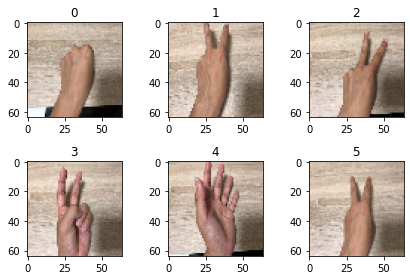

In [ ]:
import matplotlib.pyplot as plt
image_num = 6
for i in range(0, image_num):
  ax = plt.subplot(image_num // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(image_data[i])

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation("softmax"))

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(opt, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 61504)             0

In [ ]:
%%time
history = model.fit(train_data, epochs=EPOCHS, validation_data=val_data, verbose=1)

Epoch 1/20
14/14 [==============================] - 4s 245ms/step - loss: 1.8970 - accuracy: 0.3784 - val_loss: 1.1061 - val_accuracy: 0.3929
Epoch 2/20
14/14 [==============================] - 3s 230ms/step - loss: 1.1003 - accuracy: 0.4865 - val_loss: 1.0209 - val_accuracy: 0.7321
Epoch 3/20
14/14 [==============================] - 3s 226ms/step - loss: 0.9019 - accuracy: 0.5495 - val_loss: 0.9676 - val_accuracy: 0.6429
Epoch 4/20
14/14 [==============================] - 3s 218ms/step - loss: 0.6430 - accuracy: 0.7297 - val_loss: 0.5187 - val_accuracy: 0.9107
Epoch 5/20
14/14 [==============================] - 3s 218ms/step - loss: 0.4099 - accuracy: 0.8559 - val_loss: 0.4765 - val_accuracy: 0.9107
Epoch 6/20
14/14 [==============================] - 3s 240ms/step - loss: 0.2394 - accuracy: 0.9279 - val_loss: 0.3410 - val_accuracy: 0.8929
Epoch 7/20
14/14 [==============================] - 3s 240ms/step - loss: 0.1853 - accuracy: 0.9279 - val_loss: 0.3133 - val_accuracy: 0.9464
Epoch 

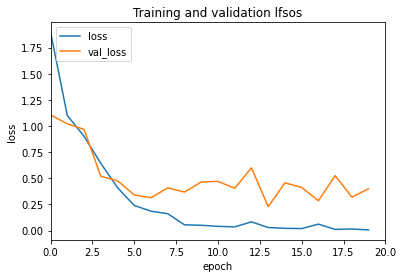

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training and validation lfsos")
plt.ylabel("loss")
plt.xlim([0.0, EPOCHS])
plt.xlabel("epoch")
plt.legend(["loss", "val_loss"], loc="upper left")
plt.show()

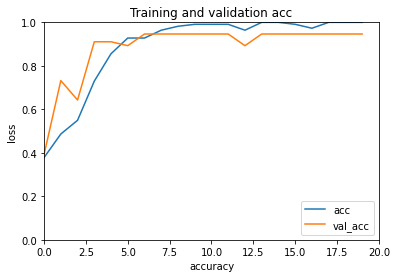

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Training and validation acc")
plt.ylim([0.0, 1.0])
plt.ylabel("loss")
plt.xlim([0.0, EPOCHS])
plt.xlabel("accuracy")
plt.legend(["acc", "val_acc"], loc="lower right")
plt.show()

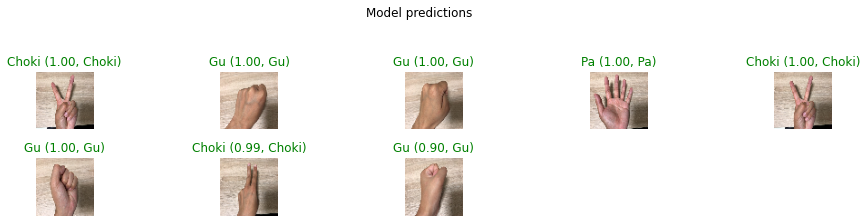

In [ ]:
import PIL.Image as Image
class_names = val_data.class_indices.items()
class_names = np.array([key.title() for key, value in class_names])
val_data.reset()

val_data.shuffle = True
val_data.batch_size = BATCH_SIZE

for validation_image_batch, validation_label_batch in val_data:
  break

validation_id = np.argmax(validation_label_batch, axis=-1)
validation_label = class_names[validation_id]

predicted_batch = model.predict(validation_image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_score = np.max(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(16, 9))
plt.subplots_adjust(hspace=0.5)

for n in range(min(validation_image_batch.shape[0], 30)):
  plt.subplot(6, 5, n + 1)
  plt.imshow(np.array(validation_image_batch[n] * 255, np.int32))
  color = "green" if predicted_id[n] == validation_id[n] else "red"
  predicted_label = predicted_label_batch[n].title()
  plt.title(predicted_label + " ({:.2f}, {})".format(predicted_score[n], validation_label[n]), color=color)
  plt.axis("off")
_ = plt.suptitle("Model predictions")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


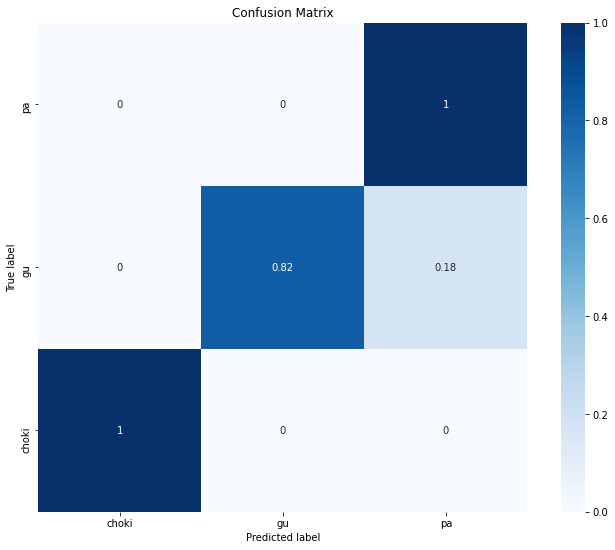

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_data.reset()
val_data.shuffle = False
val_data.batch_size = 1

for validation_image_batch, validation_label_batch in val_data:
  break

predicted = model.predict_generator(val_data, steps=val_data.n)
predicted_classes = np.argmax(predicted, axis=-1)

cm = confusion_matrix(val_data.classes, predicted_classes)
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues, xticklabels=val_data.class_indices, yticklabels=val_data.class_indices)

plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 3.0])
plt.show()


In [ ]:
save_model_path = os.path.join(backup_dir, "my_model.h5")
model.save(save_model_path)